In [ ]:
from google.colab import files
src = list(files.upload().values())[0]
open('intent_classification_helper.py','wb').write(src)
from intent_classification_helper import *

In [ ]:
from intent_classification_helper import *

In [ ]:
import sys
sys.path.append('..')


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/data/Copy of IMDB.csv',error_bad_lines=False,engine='python',encoding='utf-8',names=['review','sentiment'])

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# preprocess text

print('Preprocessing text on whole set...')
preprocess_text(dataset, 'review')

dataset_train,dataset_test = dataset[1:25000:],dataset[25000::]
le = LabelEncoder()
dataset_train['sentiment'] = le.fit_transform(dataset_train['sentiment'])
dataset_test['sentiment'] = le.fit_transform(dataset_test['sentiment'])

onehot_encoder = OneHotEncoder()
y_train = onehot_encoder.fit_transform(dataset_train['sentiment'].values.reshape(-1, 1)).todense()
y_test = onehot_encoder.fit_transform(dataset_test['sentiment'].values.reshape(-1, 1)).todense()

Preprocessing text on whole set...


Start text preprocessing: 
--------------------------
Converting to lowercase...
--------------------------
Removing html tags...
--------------------------
Removing nonword characters...
--------------------------
Removing stopwords...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Text preprocessing completed.




<ipython-input-6-2eab4d1b0639>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_train['sentiment'] = le.fit_transform(dataset_train['sentiment'])
<ipython-input-6-2eab4d1b0639>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test['sentiment'] = le.fit_transform(dataset_test['sentiment'])


In [ ]:
x_train_text = dataset_train['review'].tolist()
x_test_text = dataset_test['review'].tolist()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(max_df=1.0, min_df=0, max_features=10000)

tv.fit(x_train_text)
x_train = tv.transform(x_train_text).toarray()
x_test = tv.transform(x_test_text).toarray()

vocab = tv.get_feature_names_out()

print('TF-IDF vocabulary size: ', len(vocab))
#print(pd.DataFrame(x_train, columns=vocab))
model = random_foreset_classifier(x_train=x_train, y_train=y_train, num_features=len(vocab), n_estimators=2, max_depth=None, saving=False)
evaluate_model(model=model, name='random_forest_{}_features_n_estimators=2_max_depth=None'.format(len(vocab)), x_test=x_test, y_test=y_test, num_features=len(vocab), path='', filename='')



TF-IDF vocabulary size:  10000


np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html


evaluate the model:  random_forest_10000_features_n_estimators=2_max_depth=None
accuracy score:  0.6522939082436703
balanced accuracy score:  0.6527336390808121
weighted precision:  0.6876457010308823
weighted recall:  0.6522939082436703
weighted f1 score:  0.6354090136568021
macro f1 score:  0.6355682756549399


FileNotFoundError: ignored

<h2> Interpretability </h2>

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 10.8 MB/s eta 0:00:00


In [ ]:
import shap

shap.initjs()

In [ ]:
def make_predictions(X_batch_text):
    X_batch = tv.transform(X_batch_text).toarray()
    preds = model.predict(X_batch)
    return preds

masker = shap.maskers.Text(tokenizer=r"\W+")
explainer = shap.Explainer(make_predictions, masker=masker)

In [ ]:
import re
X_batch_text = x_test_text[1:3]
for text in X_batch_text:
    print(re.split(r"\W+", text))
    print()

['movie', 'bad', 'start', 'purpose', 'movie', 'angela', 'wanted', 'get', 'high', 'body', 'count', 'acting', 'horrible', 'killings', 'acted', 'badly', 'like', 'ally', 'got', 'stuffed', 'toilet', 'guess', 'abandoned', 'cabin', 'end', 'movie', 'comes', 'molly', 'guy', 'cabin', 'see', 'ally', 'angela', 'must', 'gone', 'get', 'part', 'really', 'got', 'black', 'girl', 'angela', 'cabin', 'angela', 'took', 'guitar', 'string', 'chocked', 'one', 'horrible', 'acting', 'two', 'turn', 'around', 'punch', 'bitch', 'molly', 'getting', 'chased', 'angela', 'neigh', 'turn', 'around', 'stab', 'stupid', 'movie', 'sucked']

['god', 'never', 'felt', 'insulted', 'whole', 'life', 'crap', 'many', 'ways', 'describe', 'piece', 'crap', 'think', 'said', 'everything', 'came', 'mind', 'would', 'get', 'banned', 'site', 'begin', 'well', 'one', 'take', 'knowledge', 'original', 'series', 'know', 'movie', 'slap', 'face', 'people', 'seen', 'biggest', 'butchering', 'theme', 'song', 'ever', 'made', 'metal', 'version', 'freak

In [ ]:
shap_values = explainer(X_batch_text)

In [ ]:
X_batch = x_test[1:3]
preds_proba = model.predict(X_batch)
preds = preds_proba.argmax(axis=1)

In [ ]:
preds

array([0, 1])

In [ ]:
classes = np.array([0, 1])

In [ ]:
shap.text_plot(shap_values[0])

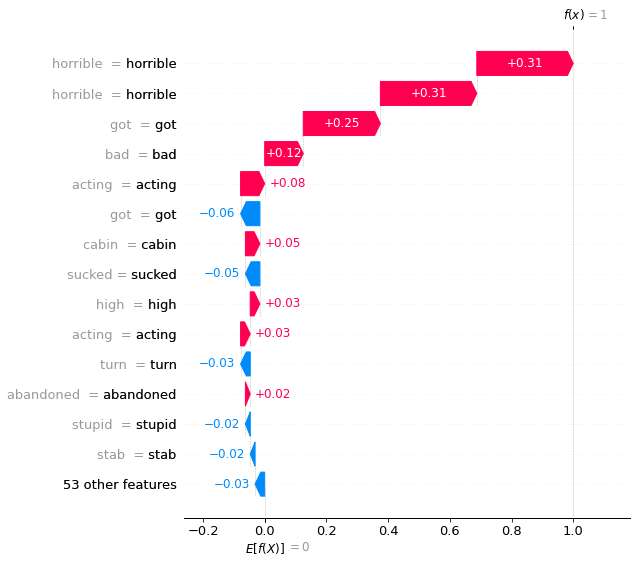

In [ ]:
shap.waterfall_plot(shap_values[0][:, classes[preds[0]]], max_display=15)

In [ ]:
x_test_text[:50]

['film never made honestly must admit saw serious doubts director great actress though lot movies holland young woman took main part tv personality constant smile face much self criticism actor played main part recently saw bride flight although film better convince start story read novel based upon script underlays film something might done mind kids birthday party rainy sunday afternoon someone age director likes watch good movie something really disturbing overdubbed dialogues time spoken loud regards go cameraman least tried make something pity film edited lousy scenes certainly credible',
 'movie bad start purpose movie angela wanted get high body count acting horrible killings acted badly like ally got stuffed toilet guess abandoned cabin end movie comes molly guy cabin see ally angela must gone get part really got black girl angela cabin angela took guitar string chocked one horrible acting two turn around punch bitch molly getting chased angela neigh turn around stab stupid mov

In [ ]:
explainer = shap.TreeExplainer(model) # we only need to pass our  fitted model to tree explainer. 
                                    #No background dataset in 'data' argument required for tree models as it
                                    #is automatically received through the model tree object.

# finding out the shap values using the explainer
shap_values = explainer.shap_values(x_train)

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, X_test)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_feature_graph(model_name, eval_path, reverse_rows=False):
  # plot the feature importance graph for random forest
  plt.title('Performance of {} vs Feature Numbers'.format(model_name))
  plt.xlabel('Number of Features')
  plt.ylabel('Score')

  eval_result = pd.read_csv(eval_path, error_bad_lines=False, engine='python', encoding='utf-8')
  if reverse_rows:
    eval_result = eval_result.loc[::-1]

  feature_numbers = eval_result['num_features'].to_list()
  accuracy_scores = eval_result['accuracy score'].to_list()
  balanced_accuracy_scores = eval_result['balanced accuracy score'].to_list()
  weighted_precision = eval_result['weighted precision'].to_list()
  weighted_recall = eval_result['weighted recall'].to_list()
  weighted_f1_scores = eval_result['weighted f1 score'].to_list()
  macro_f1_scores = eval_result['macro f1 score'].to_list()

  plt.plot(feature_numbers, accuracy_scores, label='accuracy score')
  plt.plot(feature_numbers, weighted_precision, label='weighted precision')
  plt.plot(feature_numbers, weighted_recall, label='weighted recall')
  plt.plot(feature_numbers, weighted_f1_scores, label='weighted f1 score')
  plt.legend()
  plt.grid()

  plt.figure()
  plt.xlabel('Number of Features')
  plt.ylabel('Score')
  plt.plot(feature_numbers, balanced_accuracy_scores, label='balanced accuracy score')
  plt.plot(feature_numbers, macro_f1_scores, label='macro f1 score')

  plt.legend()
  plt.grid()
  plt.show()

C:\Users\35262\AppData\Local\Temp\ipykernel_31268\2169805188.py:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  eval_result = pd.read_csv(eval_path, error_bad_lines=False, engine='python', encoding='utf-8')


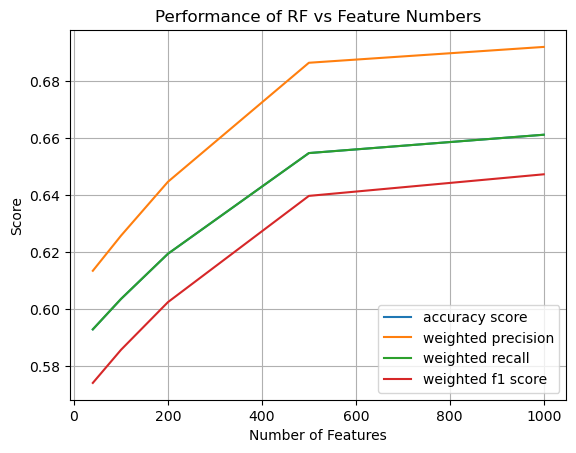

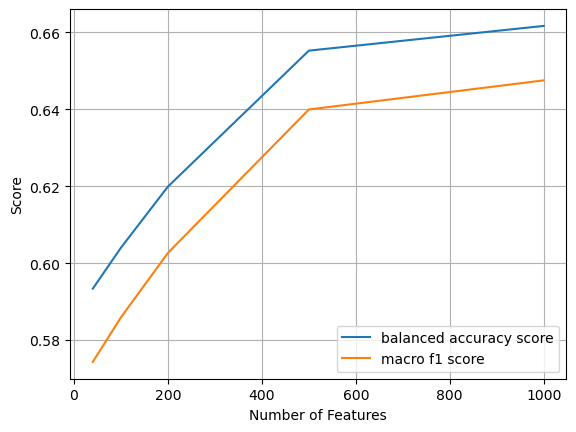

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# plot the feature importance graph for random forest
plt.title('Performance of RF vs Feature Numbers')
plt.xlabel('Number of Features')
plt.ylabel('Score')

eval_path = '../IMBD/models/evaluation_rf_updated.csv'
eval_result = pd.read_csv(eval_path, error_bad_lines=False, engine='python', encoding='utf-8')

feature_numbers = eval_result['num_features'].to_list()
accuracy_scores = eval_result['accuracy score'].to_list()
balanced_accuracy_scores = eval_result['balanced accuracy score'].to_list()
weighted_precision = eval_result['weighted precision'].to_list()
weighted_recall = eval_result['weighted recall'].to_list()
weighted_f1_scores = eval_result['weighted f1 score'].to_list()
macro_f1_scores = eval_result['macro f1 score'].to_list()

plt.plot(feature_numbers, accuracy_scores, label='accuracy score')
plt.plot(feature_numbers, weighted_precision, label='weighted precision')
plt.plot(feature_numbers, weighted_recall, label='weighted recall')
plt.plot(feature_numbers, weighted_f1_scores, label='weighted f1 score')
plt.legend()
plt.grid()

plt.figure()
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.plot(feature_numbers, balanced_accuracy_scores, label='balanced accuracy score')
plt.plot(feature_numbers, macro_f1_scores, label='macro f1 score')

plt.legend()
plt.grid()
plt.show()

In [ ]:
dataset_train['review'].head()

0                                               review
1    one reviewers mentioned watching 1 oz episode ...
2    wonderful little production filming technique ...
3    thought wonderful way spend time hot summer we...
4    basically family little boy jake thinks zombie...
Name: review, dtype: object

In [ ]:
# word2vec
sents_train = []

for row in dataset_train['review'].tolist():
  sents_train.append(row.split())
  
sents_test = []

for row in dataset_test['review'].tolist():
  sents_test.append(row.split())

In [ ]:
!pip install --upgrade gensim==4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from gensim.models import Word2Vec

In [ ]:
sents_train

In [ ]:
def w2v_rf():
  # chaneg min_count parameter to control different number of features
  #for limit in range(1, 11): 
  #for limit in range(12, 31):
  for limit in range(1, 11):
    model_w2v = Word2Vec(sents_train, min_count=limit)
    model_w2v.train(sents_train, total_examples=model_w2v.corpus_count, epochs=30)
    num_features = len(model_w2v.wv.index_to_key)

    w2v_ebd_len = model_w2v.wv['time'].shape[0]
    x_train_w2v = np.zeros([25000, w2v_ebd_len]) # initialize to zero, save zero padding
    x_test_w2v = np.zeros([25000, w2v_ebd_len])

    # build x_train_w2v with averaged word embedding
    for i in range(25000):
      sent = sents_train[i]
      if sent == []: # handle the case with division, if it is empty sent, set to zero
        continue 
      word_count = 0
      for j in range(len(sent)):
        word = sent[j]
        if word not in model_w2v.wv:
          continue
        word_count += 1
        x_train_w2v[i] = np.add(x_train_w2v[i], model_w2v.wv[word])
      if word_count > 0:
        x_train_w2v[i] = np.divide(x_train_w2v[i], word_count)
    
    y_train_w2v = y_train

    # build x_test_w2v with averaged word embedding
    for i in range(25000):
      sent = sents_test[i]
      if sent == []: 
        continue 
      word_count = 0
      for j in range(len(sent)):
        word = sent[j]
        if word not in model_w2v.wv:
          continue
        word_count += 1
        x_test_w2v[i] = np.add(x_test_w2v[i], model_w2v.wv[word])
      if word_count > 0:
        x_test_w2v[i] = np.divide(x_test_w2v[i], word_count)

      y_test_w2v = y_test

    model_rf_w2v = RandomForestClassifier(n_estimators=2, max_depth=None)
    x_train_w2v = x_train_w2v[:25000]
    y_train_w2v = y_train_w2v[:25000]
    model_rf_w2v.fit(x_train_w2v, y_train_w2v)
    x_test_w2v = x_test_w2v[:25000]
    y_test_w2v = y_test_w2v[:25000]

    evaluate_model(model=model_rf_w2v, name='random_forest_w2v_features_{}_n_estimators=2_max_depth=None'.format(num_features), x_test=x_test_w2v, y_test=y_test_w2v, num_features=num_features,
                   path="C:\\Users\\35262\\Desktop\\acl_demo\\IMBD\\models", filename='evaluation_rf_w2v.csv')

In [ ]:
w2v_rf()

c:\Users\35262\.conda\envs\acl_demo\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


evaluate the model:  random_forest_w2v_features_77506_n_estimators=2_max_depth=None
accuracy score:  0.6888
balanced accuracy score:  0.68918536889158
weighted precision:  0.7193175549368258
weighted recall:  0.6888
weighted f1 score:  0.6777912655930154
macro f1 score:  0.6779144269934377


c:\Users\35262\.conda\envs\acl_demo\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


evaluate the model:  random_forest_w2v_features_47767_n_estimators=2_max_depth=None
accuracy score:  0.6954
balanced accuracy score:  0.6957525333037602
weighted precision:  0.7211841834418465
weighted recall:  0.6954
weighted f1 score:  0.6864393856988923
macro f1 score:  0.6865489441149887


c:\Users\35262\Desktop\acl_demo\ATIS\..\intent_classification_helper.py:143: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  eval_result = pd.read_csv(eval_path, error_bad_lines=False, engine='python', encoding='utf-8')
c:\Users\35262\Desktop\acl_demo\ATIS\..\intent_classification_helper.py:144: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_result = eval_result.append({'model': name, 'accuracy score': accuracy_score_val, 'balanced accuracy score': balanced_accuracy,
c:\Users\35262\.conda\envs\acl_demo\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


evaluate the model:  random_forest_w2v_features_38229_n_estimators=2_max_depth=None
accuracy score:  0.69492
balanced accuracy score:  0.6952951617249877
weighted precision:  0.7245283458933479
weighted recall:  0.69492
weighted f1 score:  0.6847133929952636
macro f1 score:  0.6848306843906771


c:\Users\35262\Desktop\acl_demo\ATIS\..\intent_classification_helper.py:143: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  eval_result = pd.read_csv(eval_path, error_bad_lines=False, engine='python', encoding='utf-8')
c:\Users\35262\Desktop\acl_demo\ATIS\..\intent_classification_helper.py:144: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_result = eval_result.append({'model': name, 'accuracy score': accuracy_score_val, 'balanced accuracy score': balanced_accuracy,
c:\Users\35262\.conda\envs\acl_demo\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


evaluate the model:  random_forest_w2v_features_32719_n_estimators=2_max_depth=None
accuracy score:  0.696
balanced accuracy score:  0.6963695919734028
weighted precision:  0.7247721929158497
weighted recall:  0.696
weighted f1 score:  0.6861398963733649
macro f1 score:  0.6862549087979017


c:\Users\35262\Desktop\acl_demo\ATIS\..\intent_classification_helper.py:143: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  eval_result = pd.read_csv(eval_path, error_bad_lines=False, engine='python', encoding='utf-8')
c:\Users\35262\Desktop\acl_demo\ATIS\..\intent_classification_helper.py:144: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_result = eval_result.append({'model': name, 'accuracy score': accuracy_score_val, 'balanced accuracy score': balanced_accuracy,
c:\Users\35262\.conda\envs\acl_demo\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


evaluate the model:  random_forest_w2v_features_29090_n_estimators=2_max_depth=None
accuracy score:  0.70168
balanced accuracy score:  0.7020469541359424
weighted precision:  0.7307919511432537
weighted recall:  0.70168
weighted f1 score:  0.692147771274133
macro f1 score:  0.6922597631163708


c:\Users\35262\Desktop\acl_demo\ATIS\..\intent_classification_helper.py:143: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  eval_result = pd.read_csv(eval_path, error_bad_lines=False, engine='python', encoding='utf-8')
c:\Users\35262\Desktop\acl_demo\ATIS\..\intent_classification_helper.py:144: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_result = eval_result.append({'model': name, 'accuracy score': accuracy_score_val, 'balanced accuracy score': balanced_accuracy,
c:\Users\35262\.conda\envs\acl_demo\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


evaluate the model:  random_forest_w2v_features_26414_n_estimators=2_max_depth=None
accuracy score:  0.70012
balanced accuracy score:  0.7004783777496535
weighted precision:  0.7275075432606835
weighted recall:  0.70012
weighted f1 score:  0.6909947158257391
macro f1 score:  0.6911044809835142


c:\Users\35262\Desktop\acl_demo\ATIS\..\intent_classification_helper.py:143: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  eval_result = pd.read_csv(eval_path, error_bad_lines=False, engine='python', encoding='utf-8')
c:\Users\35262\Desktop\acl_demo\ATIS\..\intent_classification_helper.py:144: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_result = eval_result.append({'model': name, 'accuracy score': accuracy_score_val, 'balanced accuracy score': balanced_accuracy,
c:\Users\35262\.conda\envs\acl_demo\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


evaluate the model:  random_forest_w2v_features_24251_n_estimators=2_max_depth=None
accuracy score:  0.70632
balanced accuracy score:  0.7066756589615709
weighted precision:  0.7340591035324082
weighted recall:  0.70632
weighted f1 score:  0.6975241914567396
macro f1 score:  0.6976308073178701


c:\Users\35262\Desktop\acl_demo\ATIS\..\intent_classification_helper.py:143: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  eval_result = pd.read_csv(eval_path, error_bad_lines=False, engine='python', encoding='utf-8')
c:\Users\35262\Desktop\acl_demo\ATIS\..\intent_classification_helper.py:144: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_result = eval_result.append({'model': name, 'accuracy score': accuracy_score_val, 'balanced accuracy score': balanced_accuracy,
c:\Users\35262\.conda\envs\acl_demo\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


evaluate the model:  random_forest_w2v_features_22539_n_estimators=2_max_depth=None
accuracy score:  0.71012
balanced accuracy score:  0.7104689361728055
weighted precision:  0.7371763868904687
weighted recall:  0.71012
weighted f1 score:  0.7017740815360016
macro f1 score:  0.7018771910062149


c:\Users\35262\Desktop\acl_demo\ATIS\..\intent_classification_helper.py:143: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  eval_result = pd.read_csv(eval_path, error_bad_lines=False, engine='python', encoding='utf-8')
c:\Users\35262\Desktop\acl_demo\ATIS\..\intent_classification_helper.py:144: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_result = eval_result.append({'model': name, 'accuracy score': accuracy_score_val, 'balanced accuracy score': balanced_accuracy,
c:\Users\35262\.conda\envs\acl_demo\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


evaluate the model:  random_forest_w2v_features_21108_n_estimators=2_max_depth=None
accuracy score:  0.70176
balanced accuracy score:  0.7021181352439003
weighted precision:  0.7293253510528332
weighted recall:  0.70176
weighted f1 score:  0.6926976714820592
macro f1 score:  0.6928067550660715


c:\Users\35262\Desktop\acl_demo\ATIS\..\intent_classification_helper.py:143: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  eval_result = pd.read_csv(eval_path, error_bad_lines=False, engine='python', encoding='utf-8')
c:\Users\35262\Desktop\acl_demo\ATIS\..\intent_classification_helper.py:144: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_result = eval_result.append({'model': name, 'accuracy score': accuracy_score_val, 'balanced accuracy score': balanced_accuracy,
c:\Users\35262\.conda\envs\acl_demo\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


evaluate the model:  random_forest_w2v_features_19888_n_estimators=2_max_depth=None
accuracy score:  0.69936
balanced accuracy score:  0.699724947290012
weighted precision:  0.7277882293472274
weighted recall:  0.69936
weighted f1 score:  0.6898614372452367
macro f1 score:  0.6899736419847295


c:\Users\35262\Desktop\acl_demo\ATIS\..\intent_classification_helper.py:143: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  eval_result = pd.read_csv(eval_path, error_bad_lines=False, engine='python', encoding='utf-8')
c:\Users\35262\Desktop\acl_demo\ATIS\..\intent_classification_helper.py:144: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_result = eval_result.append({'model': name, 'accuracy score': accuracy_score_val, 'balanced accuracy score': balanced_accuracy,


C:\Users\35262\AppData\Local\Temp\ipykernel_31268\3798323360.py:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  eval_result = pd.read_csv(eval_path, error_bad_lines=False, engine='python', encoding='utf-8')


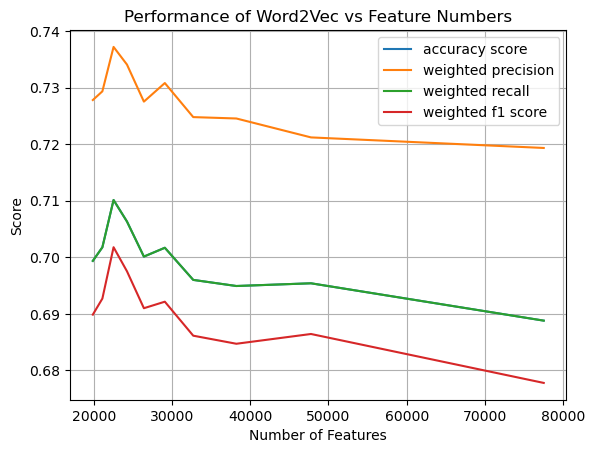

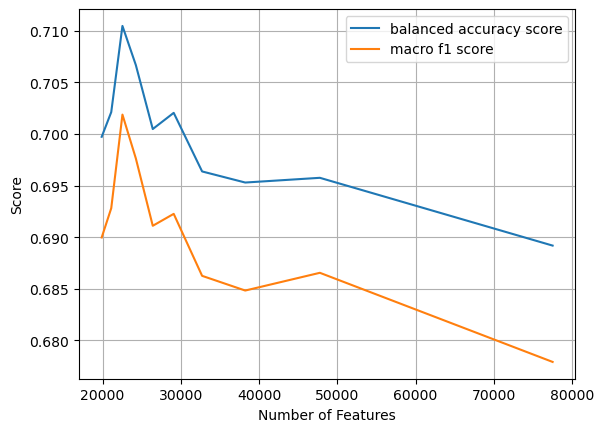

In [ ]:
eval_path='C:\\Users\\35262\\Desktop\\acl_demo\\IMBD\\models\evaluation_rf_w2v.csv'
# eval_path='../mo'

plot_feature_graph(model_name='Word2Vec', eval_path=eval_path, reverse_rows=True)

In [ ]:
#Doc2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(sents_train)]

In [ ]:
model_d2v = Doc2Vec(documents, min_count=1, epochs=30)

In [ ]:
model_d2v.corpus_count

In [ ]:
model_d2v.train(documents, total_examples=model_d2v.corpus_count, epochs=model_d2v.epochs)

In [ ]:
len(model_d2v.wv.vocab)

77506

In [ ]:
model_d2v.infer_vector(sents_train[0]).shape[0]

100

In [ ]:
#def d2v_rf():
  # change min_count parameter to control different number of features
  #for limit in range(1, 51):
model_d2v = Doc2Vec(documents, min_count=51, epochs=30)
model_d2v.train(documents, total_examples=model_d2v.corpus_count, epochs=model_d2v.epochs)

num_features = len(model_d2v.wv.vocab)

d2v_ebd_len = model_d2v.infer_vector(sents_train[0]).shape[0]
x_train_d2v = np.zeros([len(x_train_text), d2v_ebd_len]) # initialize to zero, save zero padding
x_test_d2v = np.zeros([len(x_test_text), d2v_ebd_len])

for i in range(len(sents_train)):
  sent = sents_train[i]
  x_train_d2v[i] = model_d2v.infer_vector(sent)

y_train_d2v = y_train

for i in range(len(sents_test)):
  sent = sents_test[i]
  x_test_d2v[i] = model_d2v.infer_vector(sent)

y_test_d2v = y_test

model_rf_d2v = RandomForestClassifier(n_estimators=150, max_depth=None)
model_rf_d2v.fit(x_train_d2v, y_train_d2v)

evaluate_model(model=model_rf_d2v, name='random_forest_d2v_features_{}_n_estimators=150_max_depth=None'.format(num_features), x_test=x_test_d2v, y_test=y_test_d2v, num_features=num_features,
                path='/content/drive/MyDrive/nlp_datasets/ATIS dataset/models', filename='evaluation_rf_d2v.csv')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


evaluate the model:  random_forest_d2v_features_6857_n_estimators=150_max_depth=None
accuracy score:  0.8252869885204592
balanced accuracy score:  0.8252838136755709
weighted precision:  0.8252880067172238
weighted recall:  0.8252869885204592
weighted f1 score:  0.8252863092834803
macro f1 score:  0.8252851545806161


FileNotFoundError: ignored

## Interpretability

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 9.4 MB/s eta 0:00:00


In [ ]:
import shap

shap.initjs()

In [ ]:
shap_vals = SHAP_explainer.shap_values(x_test_d2v)

In [ ]:
def make_predictions(X_batch_text):
    X_batch = np.zeros([len(X_batch_text), d2v_ebd_len])
    for i in range(len(X_batch_text)):
      sent = sents_test[i]
      X_batch[i] = model_d2v.infer_vector(sent)
    preds = model_rf_d2v.predict(X_batch)
    return preds

masker = shap.maskers.Text(tokenizer=r"\W+")
explainer = shap.Explainer(make_predictions, masker=masker)

In [ ]:
x_test_text[1]

'movie bad start purpose movie angela wanted get high body count acting horrible killings acted badly like ally got stuffed toilet guess abandoned cabin end movie comes molly guy cabin see ally angela must gone get part really got black girl angela cabin angela took guitar string chocked one horrible acting two turn around punch bitch molly getting chased angela neigh turn around stab stupid movie sucked'

In [ ]:
X_batch_text = x_test_text[1:3]

shap_values = explainer(X_batch_text)

Partition explainer: 3it [00:11, 11.69s/it]               


In [ ]:
X_batch = np.zeros([len(X_batch_text), d2v_ebd_len])
for i in range(len(X_batch_text)):
  sent = sents_test[i]
  X_batch[i] = model_d2v.infer_vector(sent)
preds_proba = model_rf_d2v.predict(X_batch)
preds = preds_proba.argmax(axis=1)

In [ ]:
preds

array([0, 0])

In [ ]:
classes = np.array([0,1])

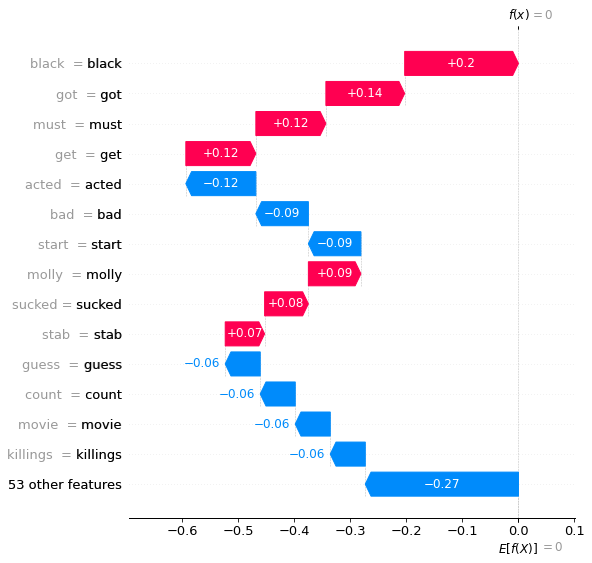

In [ ]:
shap.waterfall_plot(shap_values[0][:, classes[preds[0]]], max_display=15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  


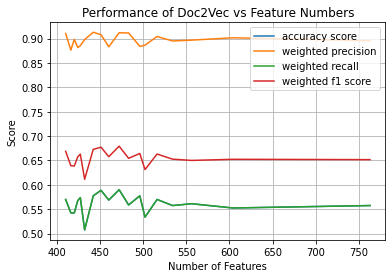

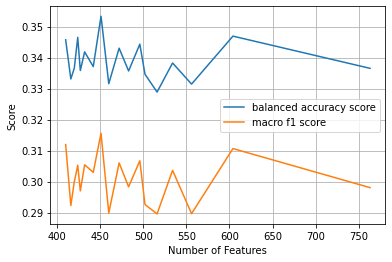

In [ ]:
eval_path='/content/drive/MyDrive/nlp_datasets/ATIS dataset/models/evaluation_rf_d2v.csv'
plot_feature_graph(model_name='Doc2Vec', eval_path=eval_path, reverse_rows=True)

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 28.0 MB/s 
     |████████████████████████████████| 6.6 MB 62.5 MB/s 
     |████████████████████████████████| 120 kB 76.1 MB/s 


In [ ]:
import torch
from transformers import BertTokenizer, BertModel

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
text = atis_train['message'][0]
text = '[CLS] ' + text + ' [SEP]'

tokenized_text = tokenizer.tokenize(text)

In [ ]:
tokenized_text

['[CLS]',
 'want',
 'fly',
 'boston',
 '83',
 '##8',
 'arrive',
 'denver',
 '111',
 '##0',
 'morning',
 '[SEP]']

In [ ]:
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
segments_ids = [1] * len(tokenized_text)

In [ ]:
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

In [ ]:
with torch.no_grad():
  outputs = model(tokens_tensor, segments_tensors)
  hidden_states = outputs[2]

NameError: ignored

In [ ]:
len(hidden_states)

13

In [ ]:
# why -2?
sent_ebd = torch.mean(hidden_states[-2][0], dim=0)

In [ ]:
def bert_rf():
  tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
  model_bert = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)
  model_bert.eval() 

  bert_ebd_len = 768
  num_features = 768
  x_train_bert = np.zeros([len(atis_train['message']), bert_ebd_len]) # initialize to zero, save zero padding
  x_test_bert = np.zeros([len(atis_test['message']), bert_ebd_len])

  for i in range(len(atis_train['message'])):
    curr_text = atis_train['message'][i]
    curr_text = '[CLS] ' + curr_text + ' [SEP]'

    tokenized_text = tokenizer.tokenize(curr_text)

    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
    segments_ids = [1] * len(tokenized_text)

    tokens_tensor = torch.tensor([indexed_tokens])
    segments_tensors = torch.tensor([segments_ids])

    with torch.no_grad():
      outputs = model_bert(tokens_tensor, segments_tensors)
      hidden_states = outputs[2]

    sent_ebd = torch.mean(hidden_states[-2][0], dim=0)
    x_train_bert[i] = sent_ebd.numpy()

  y_train_bert = y_train
  print('training set bert encoding done')

  for i in range(len(atis_test['message'])):
    curr_text = atis_test['message'][i]
    curr_text = '[CLS] ' + curr_text + ' [SEP]'

    tokenized_text = tokenizer.tokenize(curr_text)

    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
    segments_ids = [1] * len(tokenized_text)

    with torch.no_grad():
      outputs = model_bert(tokens_tensor, segments_tensors)
      hidden_states = outputs[2]

    sent_ebd = torch.mean(hidden_states[-2][0], dim=0)
    x_test_bert[i] = sent_ebd.numpy()

  y_test_bert = y_test
  print('test set bert encoding done')

  model_rf_bert = RandomForestClassifier(n_estimators=150, max_depth=None)
  model_rf_bert.fit(x_train_bert, y_train_bert)

  evaluate_model(model=model_rf_bert, name='random_forest_d2v_features_{}_n_estimators=150_max_depth=None'.format(num_features), x_test=x_test_bert, y_test=y_test_bert, num_features=num_features,
                  path='/content/drive/MyDrive/nlp_datasets/ATIS dataset/models', filename='evaluation_rf_bert.csv')

In [ ]:
# `hidden_states` has shape [13 x 1 x 22 x 768]
# `token_vecs` is a tensor with shape [22 x 768]
token_vecs = hidden_states[-2][0]
# Calculate the average of all 22 token vectors.
sentence_embedding = torch.mean(token_vecs, dim=0)
print ("Our final sentence embedding vector of shape:", sentence_embedding.size())
Our final sentence embedding vector of shape: torch.Size([768])

In [ ]:
# Define a new example sentence with multiple meanings of the word "bank"
text = "After stealing money from the bank vault, the bank robber was seen " \
       "fishing on the Mississippi river bank."
# Add the special tokens.
marked_text = "[CLS] " + text + " [SEP]"
# Split the sentence into tokens.
tokenized_text = tokenizer.tokenize(marked_text)
# Map the token strings to their vocabulary indeces.
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
# Display the words with their indeces.
for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

In [ ]:
segments_ids = [1] * len(tokenized_text)
print (segments_ids)
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

In [ ]:
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )
# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

In [ ]:
# Run the text through BERT, and collect all of the hidden states produced
# from all 12 layers. 
with torch.no_grad():
    outputs = model(tokens_tensor, segments_tensors)
# Evaluating the model will return a different number of objects based on 
    # how it's  configured in the `from_pretrained` call earlier. In this case, 
    # becase we set `output_hidden_states = True`, the third item will be the 
    # hidden states from all layers. See the documentation for more details:
    # https://huggingface.co/transformers/model_doc/bert.html#bertmodel
    hidden_states = outputs[2]

In [ ]:
# Stores the token vectors, with shape [22 x 768]
token_vecs_sum = []
# `token_embeddings` is a [22 x 12 x 768] tensor.
# For each token in the sentence...
for token in token_embeddings:
# `token` is a [12 x 768] tensor
# Sum the vectors from the last four layers.
    sum_vec = torch.sum(token[-4:], dim=0)
    
    # Use `sum_vec` to represent `token`.
    token_vecs_sum.append(sum_vec)
print ('Shape is: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))

In [ ]:
token_vecs = hidden_states[-2][0]
# Calculate the average of all 22 token vectors.
sentence_embedding = torch.mean(token_vecs, dim=0)
print ("Our final sentence embedding vector of shape:", sentence_embedding.size())

In [ ]:
bert_rf()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


training set bert encoding done
test set bert encoding done


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_d2v_features_768_n_estimators=150_max_depth=None
accuracy score:  0.00375
balanced accuracy score:  0.125
weighted precision:  1.40625e-05
weighted recall:  0.00375
weighted f1 score:  2.8019925280199252e-05
macro f1 score:  0.0009339975093399751


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)
model_bert.eval() 

bert_ebd_len = 768
num_features = 768
x_train_bert = np.zeros([len(atis_train['message']), bert_ebd_len]) # initialize to zero, save zero padding
x_test_bert = np.zeros([len(atis_test['message']), bert_ebd_len])

# for i in range(len(atis_train['message'])):
#   curr_text = atis_train['message'][i]
#   curr_text = '[CLS] ' + curr_text + ' [SEP]'

#   tokenized_text = tokenizer.tokenize(curr_text)

#   indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
#   segments_ids = [1] * len(tokenized_text)

#   tokens_tensor = torch.tensor([indexed_tokens])
#   segments_tensors = torch.tensor([segments_ids])

#   with torch.no_grad():
#     outputs = model_bert(tokens_tensor, segments_tensors)
#     hidden_states = outputs[2]

#   sent_ebd = torch.mean(hidden_states[-2][0], dim=0)
#   x_train_bert[i] = sent_ebd.numpy()

# y_train_bert = y_train
# print('training set bert encoding done')

for i in range(len(atis_test['message'])):
  curr_text = atis_test['message'][i]
  curr_text = '[CLS] ' + curr_text + ' [SEP]'

  tokenized_text = tokenizer.tokenize(curr_text)

  indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
  segments_ids = [1] * len(tokenized_text)

  with torch.no_grad():
    outputs = model_bert(tokens_tensor, segments_tensors)
    hidden_states = outputs[2]

  sent_ebd = torch.mean(hidden_states[-2][0], dim=0)
  x_test_bert[i] = sent_ebd.numpy()

y_test_bert = y_test
print('test set bert encoding done')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


test set bert encoding done


In [ ]:
model_rf_bert = RandomForestClassifier(n_estimators=150, max_depth=None)
model_rf_bert.fit(x_test_bert, y_test_bert)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


RandomForestClassifier(n_estimators=150)

In [ ]:
evaluate_model(model=model_rf_bert, name='random_forest_d2v_features_{}_n_estimators=150_max_depth=None'.format(num_features), x_test=x_test_bert, y_test=y_test_bert, num_features=num_features,
                path='/content/drive/MyDrive/nlp_datasets/ATIS dataset/models', filename='evaluation_rf_bert_test.csv')

evaluate the model:  random_forest_d2v_features_768_n_estimators=150_max_depth=None
accuracy score:  0.79
balanced accuracy score:  0.125
weighted precision:  0.6241
weighted recall:  0.79
weighted f1 score:  0.6973184357541901
macro f1 score:  0.11033519553072627


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)
model_bert.eval() 

bert_ebd_len = 768
num_features = 768
x_train_bert = np.zeros([len(atis_train['message']), bert_ebd_len]) # initialize to zero, save zero padding
x_test_bert = np.zeros([len(atis_test['message']), bert_ebd_len])

for i in range(len(atis_train['message'])):
  curr_text = atis_train['message'][i]
  curr_text = '[CLS] ' + curr_text + ' [SEP]'

  tokenized_text = tokenizer.tokenize(curr_text)

  indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
  segments_ids = [1] * len(tokenized_text)

  tokens_tensor = torch.tensor([indexed_tokens])
  segments_tensors = torch.tensor([segments_ids])

  with torch.no_grad():
    outputs = model_bert(tokens_tensor, segments_tensors)
    hidden_states = outputs[2]

  sent_ebd = torch.mean(hidden_states[-2][0], dim=0)
  x_train_bert[i] = sent_ebd.numpy()

y_train_bert = y_train
print('training set bert encoding done')

# for i in range(len(atis_test['message'])):
#   curr_text = atis_test['message'][i]
#   curr_text = '[CLS] ' + curr_text + ' [SEP]'

#   tokenized_text = tokenizer.tokenize(curr_text)

#   indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
#   segments_ids = [1] * len(tokenized_text)

#   with torch.no_grad():
#     outputs = model_bert(tokens_tensor, segments_tensors)
#     hidden_states = outputs[2]

#   sent_ebd = torch.mean(hidden_states[-2][0], dim=0)
#   x_test_bert[i] = sent_ebd.numpy()

# y_test_bert = y_test
# print('test set bert encoding done')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


training set bert encoding done


In [ ]:
model_rf_bert = RandomForestClassifier(n_estimators=150, max_depth=None)
model_rf_bert.fit(x_train_bert, y_train_bert)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


RandomForestClassifier(n_estimators=150)

In [ ]:
evaluate_model(model=model_rf_bert, name='random_forest_d2v_features_{}_n_estimators=150_max_depth=None'.format(num_features), x_test=x_train_bert, y_test=y_train_bert, num_features=num_features,
                path='/content/drive/MyDrive/nlp_datasets/ATIS dataset/models', filename='evaluation_rf_bert_train.csv')

evaluate the model:  random_forest_d2v_features_768_n_estimators=150_max_depth=None
accuracy score:  1.0
balanced accuracy score:  1.0
weighted precision:  1.0
weighted recall:  1.0
weighted f1 score:  1.0
macro f1 score:  1.0


In [ ]:
evaluate_model(model=model_rf_bert, name='random_forest_d2v_features_{}_n_estimators=150_max_depth=None'.format(num_features), x_test=x_test_bert, y_test=y_test_bert, num_features=num_features,
                path='/content/drive/MyDrive/nlp_datasets/ATIS dataset/models', filename='evaluation_rf_bert.csv')

evaluate the model:  random_forest_d2v_features_768_n_estimators=150_max_depth=None
accuracy score:  0.04125
balanced accuracy score:  0.125
weighted precision:  0.0017015625000000002
weighted recall:  0.04125
weighted f1 score:  0.003268307322929172
macro f1 score:  0.009903961584633855


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  
